<a href="https://colab.research.google.com/github/maplexx14/aircraft-classifier/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od

od.download('https://www.kaggle.com/datasets/eabdul/flying-vehicles')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gfddfgh
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/eabdul/flying-vehicles


100%|██████████| 1.43G/1.43G [00:18<00:00, 81.4MB/s]


In [ ]:
import os
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image

In [ ]:
def get_info(path):
    for category in os.listdir(path):
        print(f"Класс {' '.join(category.split('-')).capitalize()} имеет {len(os.listdir(os.path.join(path, category)))} изображений.")
get_info(path="flying-vehicles/data/planes")

Класс Fighter jet имеет 1867 изображений.
Класс Drone имеет 1332 изображений.
Класс Passenger plane имеет 1424 изображений.
Класс Helicopter имеет 1387 изображений.
Класс Missile имеет 1334 изображений.
Класс Rocket имеет 1186 изображений.


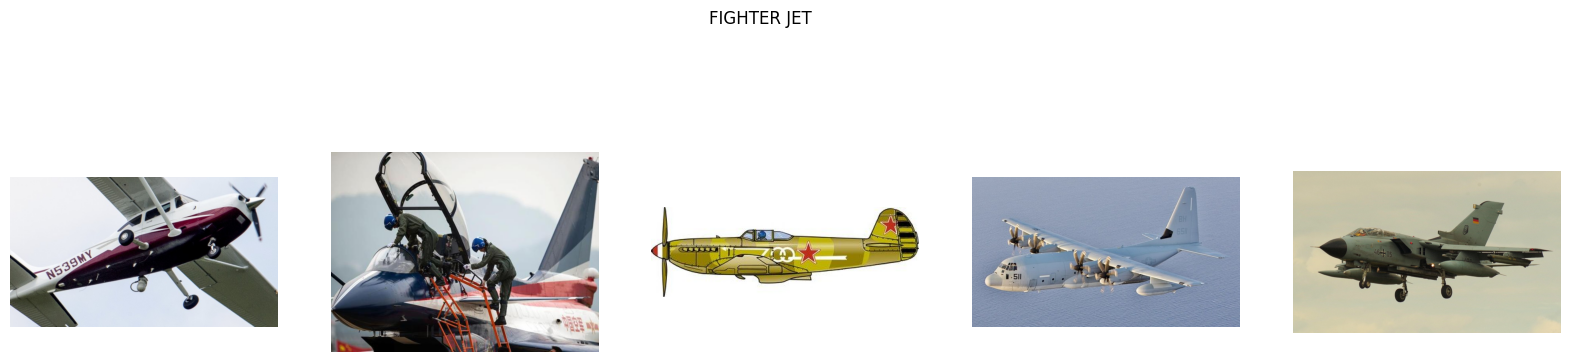

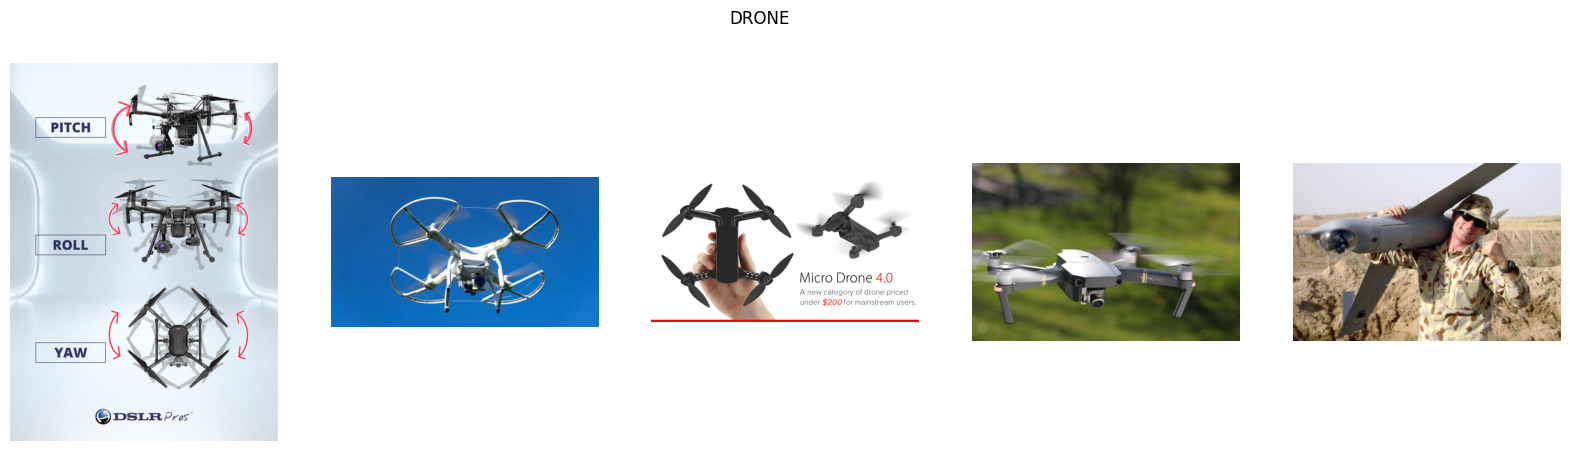

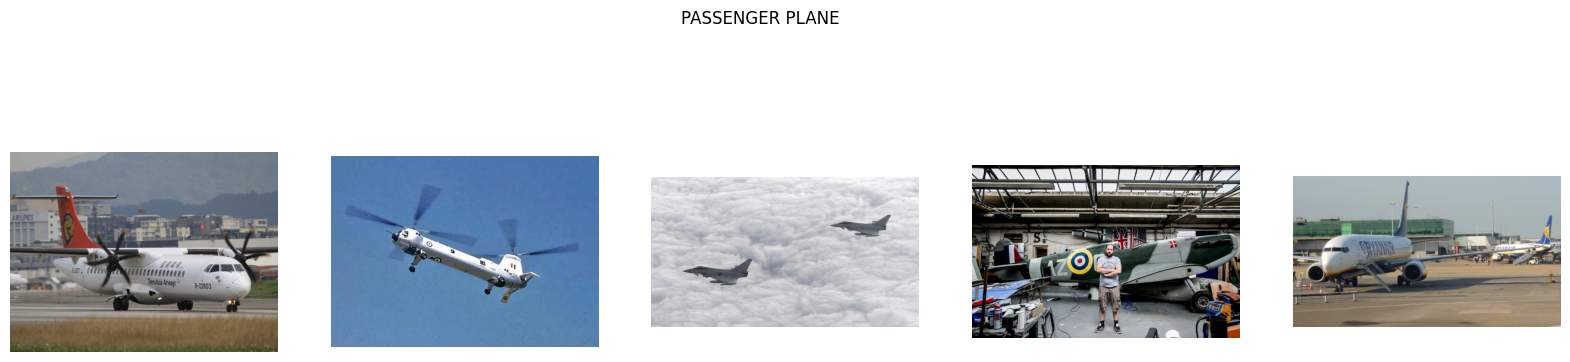

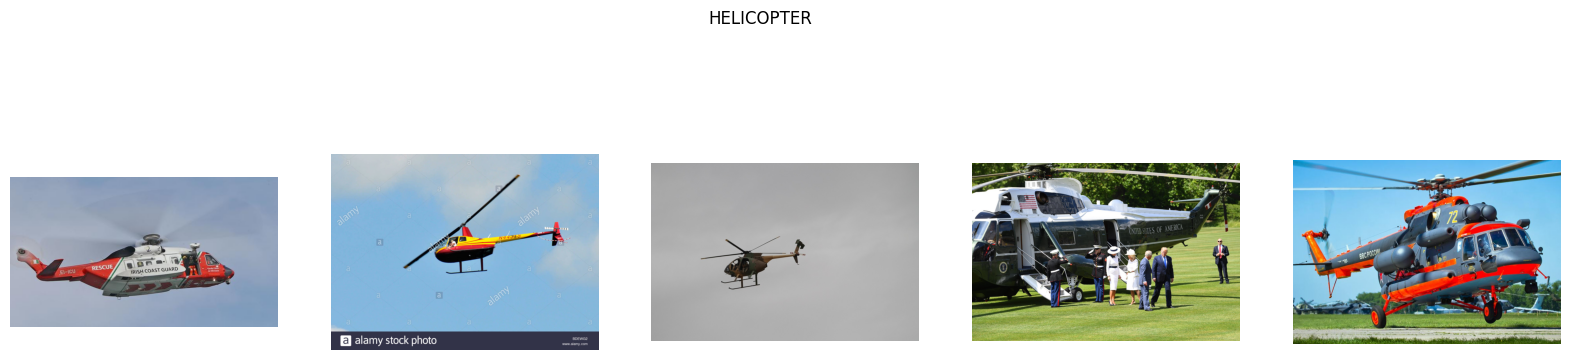

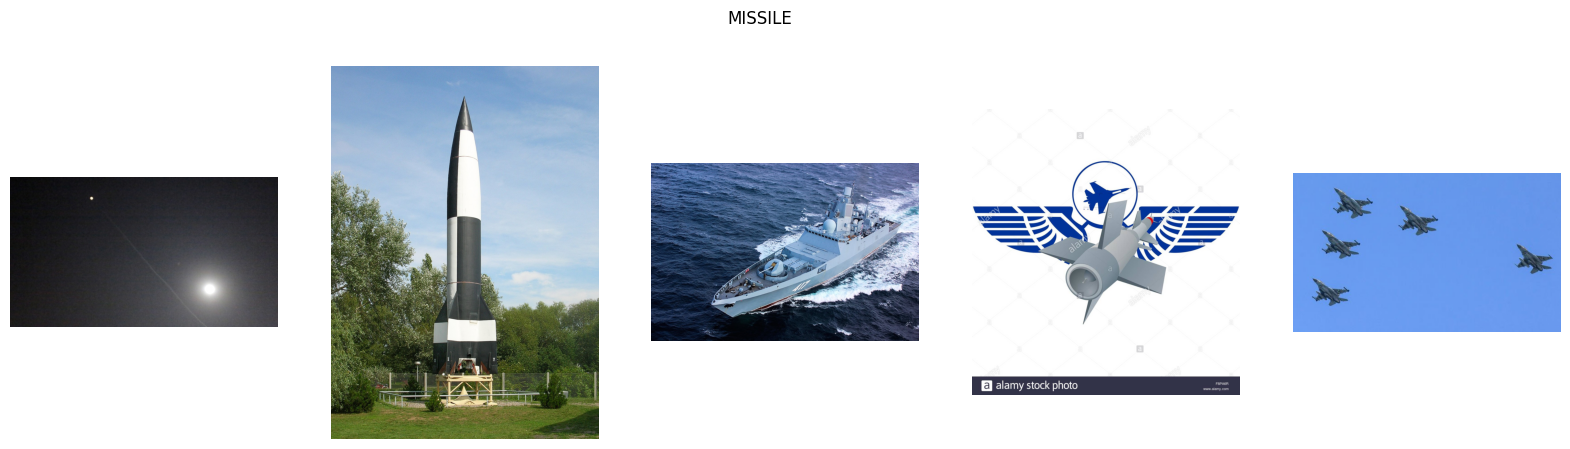

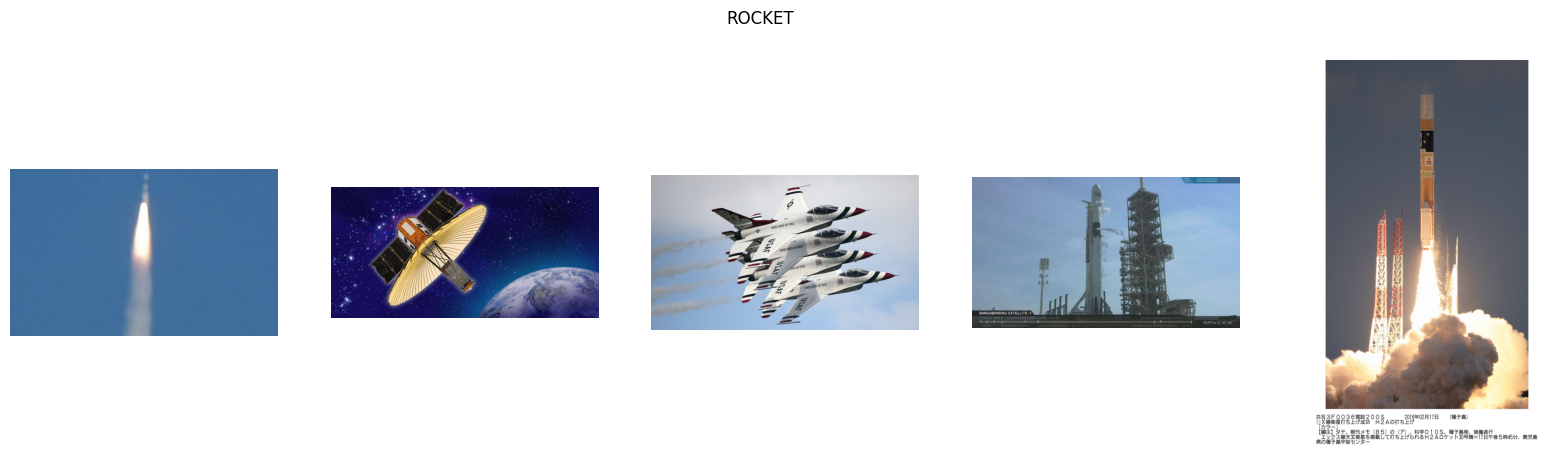

In [ ]:
def get_random_images(path):
    categories = [path+"/"+cat for cat in os.listdir(path)]
    categories_list = os.listdir(path)
    count = 0
    for category in categories:
        cat_images = list(map(lambda image: category+"/"+ image,random.choices(os.listdir(category), k=5)))
        fig, axis = plt.subplots(1, 5, figsize=(20, 5))
        fig.suptitle(f"{' '.join(categories_list[count].split('-')).upper()}")
        for image in range(5):
            img = mpimg.imread(cat_images[image])
            axis[image].imshow(img)
            axis[image].axis("off")
        count+=1
get_random_images(path="flying-vehicles/data/planes")

In [ ]:
image_datagen = ImageDataGenerator(
    rescale = 1./255,
     validation_split=0.2,
)
train_datagen = image_datagen.flow_from_directory(
    directory="flying-vehicles/data/planes",
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    subset="training",
    class_mode='categorical'
)

validation_datagen = image_datagen.flow_from_directory(
    directory="flying-vehicles/data/planes",
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    subset="validation",
    class_mode='categorical'
)

Found 6734 images belonging to 6 classes.
Found 1680 images belonging to 6 classes.


In [ ]:
input = Input(shape=(224, 224, 3))

x = Conv2D(filters=8, kernel_size=3, strides=1, padding="same", activation="relu")(input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 3))(x)

x = Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(units=100, activation="relu")(x)
output = Dense(units=6, activation="softmax")(x)

model = Model(input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 16)        2320  

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(
    train_datagen,
    epochs=10,
    steps_per_epoch=len(train_datagen),
    validation_data=validation_datagen,
    validation_steps=len(validation_datagen)
)

<ipython-input-10-1c1d4f503ad1>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
211/211 [==============================] - 362s 2s/step - loss: 1.7188 - accuracy: 0.2811 - val_loss: 1.7640 - val_accuracy: 0.2815
Epoch 2/10
211/211 [==============================] - 360s 2s/step - loss: 1.5444 - accuracy: 0.3785 - val_loss: 1.5186 - val_accuracy: 0.4137
Epoch 3/10
211/211 [==============================] - 354s 2s/step - loss: 1.3573 - accuracy: 0.4636 - val_loss: 1.4459 - val_accuracy: 0.4006
Epoch 4/10
211/211 [==============================] - 364s 2s/step - loss: 1.0912 - accuracy: 0.5832 - val_loss: 1.4813 - val_accuracy: 0.4470
Epoch 5/10
211/211 [==============================] - 366s 2s/step - loss: 0.7525 - accuracy: 0.7180 - val_loss: 1.7579 - val_accuracy: 0.3958
Epoch 6/10
211/211 [==============================] - 369s 2s/step - loss: 0.4699 - accuracy: 0.8237 - val_loss: 2.1194 - val_accuracy: 0.3839
Epoch 7/10
211/211 [==============================] - 374s 2s/step - loss: 0.3171 - accuracy: 0.8855 - val_loss: 2.7801 - val_accuracy: 0.3863

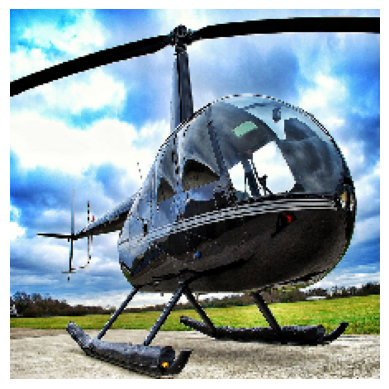

In [ ]:
image_file_name = '/content/flying-vehicles/data/planes/helicopter/00000003.jpg'
img = image.load_img(image_file_name, target_size=(224, 224))
plt.axis(False)
plt.imshow(img)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [ ]:
categories = {
    0 : "дрон",
    1 : "военный самолет",
    2 : "вертолет",
    3 : "ракета",
    4 : "пассажирский самолет",
    5 : "ракета"
}

In [ ]:
pred = model.predict(img_array)
normal_pred = pred[0]
answer = max(normal_pred)
count = 0
for i in normal_pred:
  if i == answer:
    print(f"Это {categories[count]} c шансом {round(answer*100)}%")
  count += 1

1/1 [==============================] - 0s 245ms/step
Это вертолет c шансом 100%
